In [1]:
#!pip install fredapi

In [2]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# set some styles for plotting.
plt.style.use('seaborn-v0_8-white')
color_pal = {'gold':'#CB7A09', 'aqua': '#0D8295', 'green': '#7A9D96'}

#import connection library and api key for reference.

from fredapi import Fred
#from google.colab import userdata
fred_key = '903c60c12fb92e21a8e120972ab318cc'


# 1. Create The FRED Object

In [3]:
fred = Fred(api_key = fred_key)

#2. Search for Economic Data

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-12-14   2023-12-14   
CSUSHPINSA          CSUSHPINSA     2023-12-14   2023-12-14   
SP500                    SP500     2023-12-14   2023-12-14   
MEHOINUSA672N    MEHOINUSA672N     2023-12-14   2023-12-14   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-12-14   2023-12-14   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-12-13  Daily, Close   
CSUSHPINSA            1987-01-01      2023-09-01       Monthly   
SP500                 2013-12-16      2023-12-13  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2023-12-13  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-12-14 09:08:02-06:00   
CSUSHPINSA                           NSA  2023-11-28 08:12:02-06:00   
SP500                                NSA  2023-12-13 19:11:02-06:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2023-12-14 09:08:05-06:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           93  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  84  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         83  This data represents the effective yield of th...

# 3. Pull Raw Data & Plot

In [6]:
sp500 = fred.get_series(series_id='SP500')

<AxesSubplot: title={'center': 'S&P 500'}>

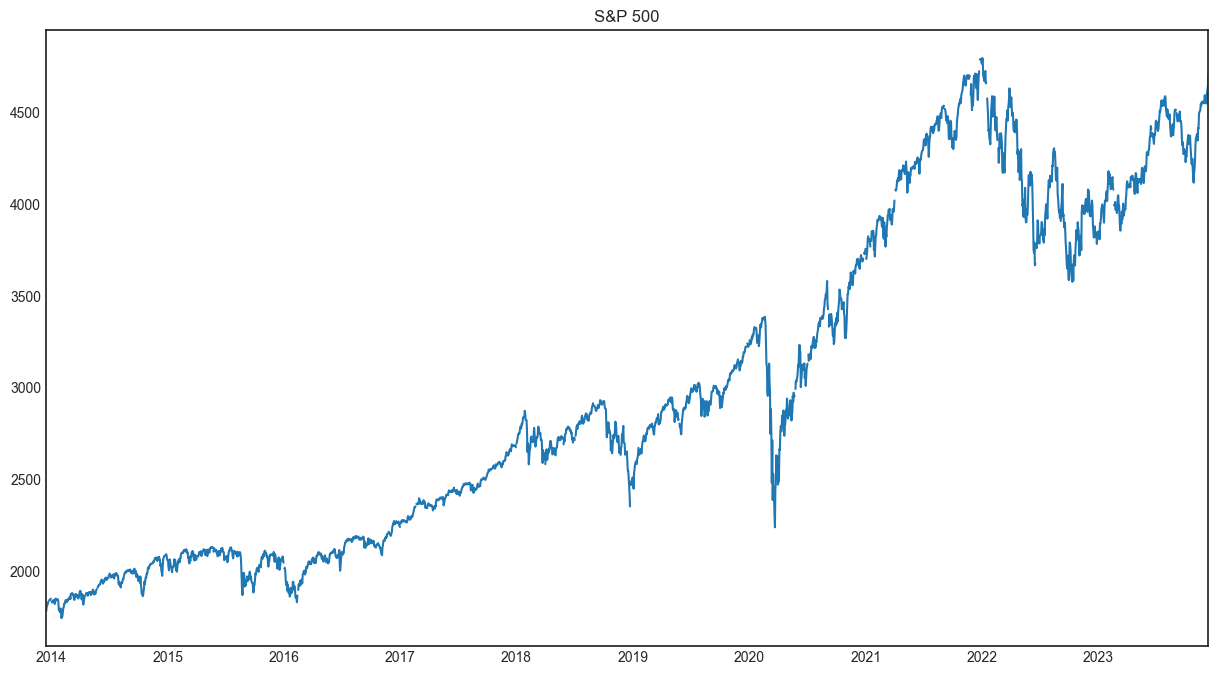

In [7]:
sp500.plot(figsize=(15,8), title= 'S&P 500', lw=1.5)


# 4. Pull and Join Multiple Data Series

In [8]:
unemp_results = fred.search('unemployment')
unemp_results

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2023-12-14   2023-12-14   
UNRATENSA      UNRATENSA     2023-12-14   2023-12-14   
CCSA                CCSA     2023-12-14   2023-12-14   
NROU                NROU     2023-12-14   2023-12-14   
UNEMPLOY        UNEMPLOY     2023-12-14   2023-12-14   
...                  ...            ...          ...   
LNU04035181  LNU04035181     2023-12-14   2023-12-14   
LNU03032231  LNU03032231     2023-12-14   2023-12-14   
LNS13023705  LNS13023705     2023-12-14   2023-12-14   
MIDL248URN    MIDL248URN     2023-12-14   2023-12-14   
SPIURN            SPIURN     2023-12-14   2023-12-14   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
CCSA                   Continued Claims (Insured Unemployment)   
NROU                          Noncyclical Rate of Unemployment   
UNEMPLOY                                    Unemployment Level   
...                                                        ...   
LNU04035181  Unemployment Rate - All Industries, Self-Emplo...   
LNU03032231  Unemployment Level - Construction Industry, Pr...   
LNS13023705                   Unemployment Level - Job Leavers   
MIDL248URN              Unemployment Rate in Midland, TX (MSA)   
SPIURN              Unemployment Rate in Springfield, MO (MSA)   

            observation_start observation_end                frequency  \
series id                                                                
UNRATE             1948-01-01      2023-11-01                  Monthly   
UNRATENSA          1948-01-01      2023-11-01                  Monthly   
CCSA               1967-01-07      2023-12-02  Weekly, Ending Saturday   
NROU               1949-01-01      2025-10-01                Quarterly   
UNEMPLOY           1948-01-01      2023-11-01                  Monthly   
...                       ...             ...                      ...   
LNU04035181        2000-01-01      2023-11-01                  Monthly   
LNU03032231        2000-01-01      2023-11-01                  Monthly   
LNS13023705        1967-01-01      2023-11-01                  Monthly   
MIDL248URN         1990-01-01      2023-10-01                  Monthly   
SPIURN             1990-01-01      2023-10-01                  Monthly   

            frequency_short                 units        units_short  \
series id                                                              
UNRATE                    M               Percent                  %   
UNRATENSA                 M               Percent                  %   
CCSA                      W                Number             Number   
NROU                      Q               Percent                  %   
UNEMPLOY                  M  Thousands of Persons  Thous. of Persons   
...                     ...                   ...                ...   
LNU04035181               M               Percent                  %   
LNU03032231               M  Thousands of Persons  Thous. of Persons   
LNS13023705               M  Thousands of Persons  Thous. of Persons   
MIDL248URN                M               Percent                  %   
SPIURN                    M               Percent                  %   

                 seasonal_adjustment seasonal_adjustment_short  \
series id                                                        
UNRATE           Seasonally Adjusted                        SA   
UNRATENSA    Not Seasonally Adjusted                       NSA   
CCSA             Seasonally Adjusted                        SA   
NROU         Not Seasonally Adjusted                       NSA   
UNEMPLOY         Seasonally Adjusted                        SA   
...                              ...                       ...   
LNU040

In [9]:
unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
2023-11-01    3.7
Length: 911, dtype: float64

<AxesSubplot: title={'center': 'S&P 500'}>

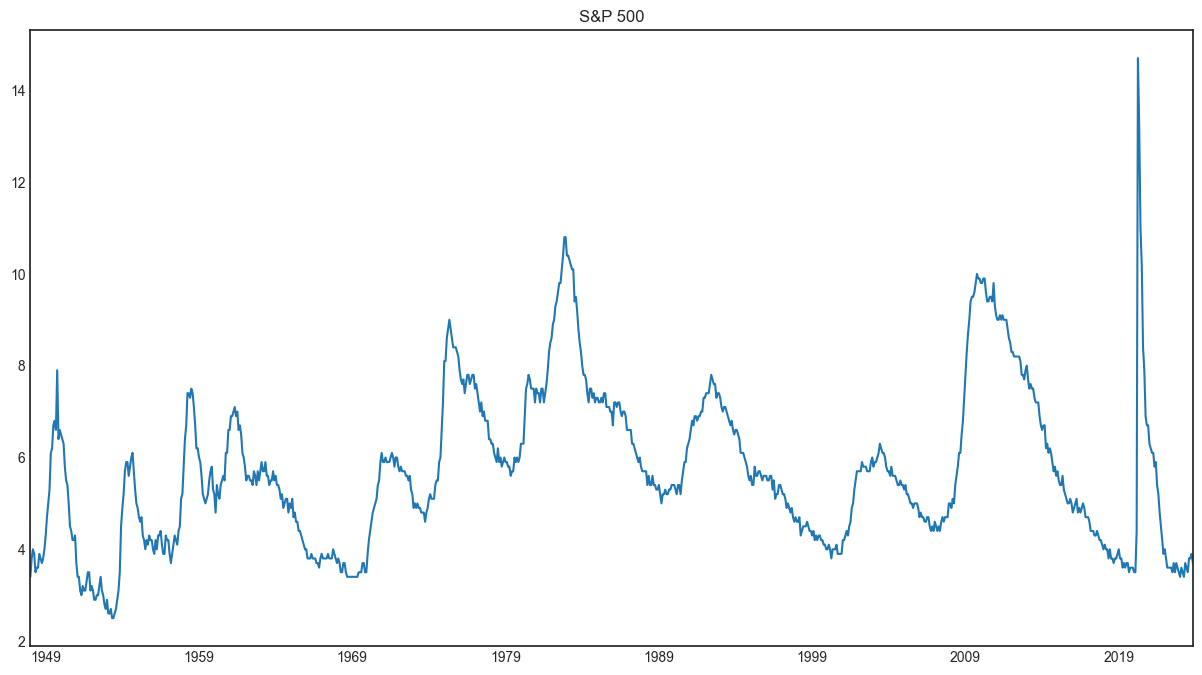

In [10]:
unrate.plot(figsize=(15,8), title= 'S&P 500', lw=1.5)

In [11]:
#filters data frame to only those series that are seasonally adjusted and as a percent monthly. Also filters to those with 'Unemployment Rate in' in the title which captures the state level data

unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"') 
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in ')]

In [13]:
unemp_df.index

Index(['CAUR', 'NYUR', 'TXUR', 'FLUR', 'OHUR', 'ALUR', 'MIUR', 'ILUR', 'GAUR',
       'PAUR', 'MAUR', 'NJUR', 'WIUR', 'NCUR', 'KYUR', 'COUR', 'AZUR', 'MNUR',
       'SCUR', 'TNUR', 'ARUR', 'WAUR', 'WVUR', 'NMUR', 'INUR', 'MDUR', 'VAUR',
       'IAUR', 'ORUR', 'UTUR', 'PRUR', 'NVUR', 'MOUR', 'AKUR', 'OKUR', 'HIUR',
       'LASMT261982000000003', 'LAUR', 'CTUR', 'NDUR', 'DCUR', 'MTUR', 'WYUR',
       'DEUR', 'IDUR', 'KSUR', 'NHUR', 'LASMT391746000000003', 'NEUR', 'MEUR',
       'RIUR', 'SDUR', 'MSUR', 'VTUR', 'CMWRUR', 'CNERUR', 'CSOUUR', 'CWSTUR',
       'CNEWUR'],
      dtype='object', name='series id')

In [14]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [23]:
unemp_states = pd.concat(all_results, axis=1).drop(['CNEWUR','CWSTUR','CSOUUR','CNERUR','CMWRUR','LASMT261982000000003','LASMT391746000000003'], axis=1)
unemp_states = unemp_states.dropna(axis=1)
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [24]:
#plot unemployment rate by state
px.line(unemp_states)

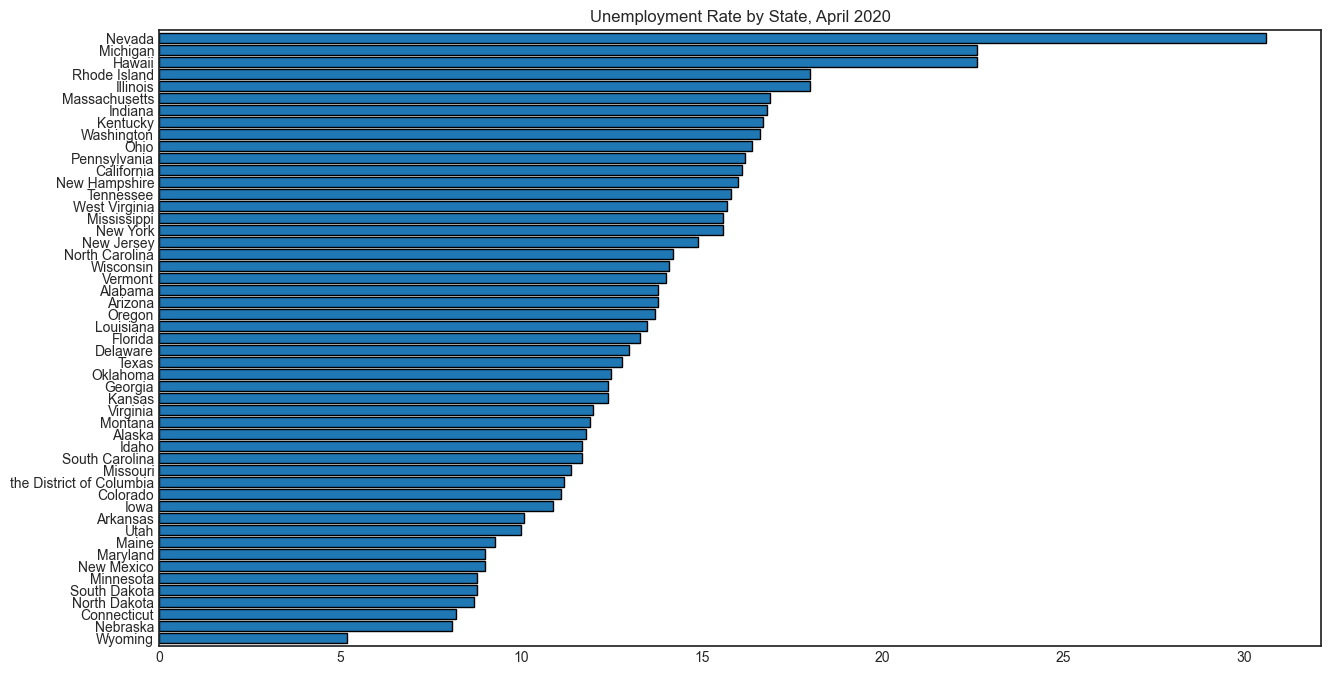

In [25]:
## Pull April 2020 Unemplyment rate per state

ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T.sort_values('2020-04-01')\
    .plot(kind='barh', figsize=(15,8),
          width = .85, 
          edgecolor='black',
          title = 'Unemployment Rate by State, April 2020')

ax.legend().remove()
plt.show()

In [26]:
# Pull the Participation Rate 

part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"') 
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]

In [27]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

part_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    part_results.append(results)

part_states = pd.concat(part_results, axis=1)

part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [20]:
part_states

California  Alabama  Florida  New York  Kentucky  Michigan  Ohio  \
1976-01-01        62.6     57.0     55.8      58.0      60.5      61.6  61.7   
1976-02-01        62.4     56.9     55.7      58.0      60.3      61.5  61.7   
1976-03-01        62.2     56.8     55.5      58.0      60.2      61.5  61.7   
1976-04-01        62.2     56.8     55.5      58.0      60.1      61.6  61.6   
1976-05-01        62.3     56.8     55.4      58.1      60.1      61.7  61.6   
...                ...      ...      ...       ...       ...       ...   ...   
2023-06-01        62.5     57.0     59.5      61.2      57.8      60.7  62.2   
2023-07-01        62.4     57.0     59.7      61.4      57.7      61.0  62.1   
2023-08-01        62.4     57.0     59.7      61.5      57.6      61.3  62.1   
2023-09-01        62.3     57.0     59.8      61.6      57.4      61.6  62.1   
2023-10-01        62.3     57.0     59.8      61.6      57.3      61.8  62.0   

            Wisconsin  Maryland  Georgia  ...  Oklahoma  Vermont  Missouri  \
1976-01-01       65.6      64.3     63.7  ...      59.3     63.6      60.5   
1976-02-01       65.5      64.2     63.6  ...      59.2     63.4      60.3   
1976-03-01       65.4      64.1     63.5  ...      59.1     63.2      60.3   
1976-04-01       65.4      64.1     63.5  ...      59.0     63.5      60.4   
1976-05-01       65.5      64.1     63.6  ...      59.0     63.6      60.6   
...               ...       ...      ...  ...       ...      ...       ...   
2023-06-01       65.3      65.3     61.3  ...      61.4     63.8      63.6   
2023-07-01       65.5      65.3     61.4  ...      61.6     63.9      63.6   
2023-08-01       65.7      65.3     61.4  ...      61.8     64.0      63.7   
2023-09-01       65.8      65.2     61.5  ...      62.1     64.1      63.7   
2023-10-01       65.8      65.2     61.6  ...      62.3     64.2      63.6   

            Nevada  Idaho  Montana  South Dakota  Wyoming  Delaware  \
1976-01-01    71.3   63.0     62.7          64.6     65.3      62.7   
1976-02-01    70.8   62.8     62.5          64.4     64.9      62.5   
1976-03-01    70.5   62.7     62.4          64.4     64.7      62.5   
1976-04-01    70.4   62.7     62.3          64.3     64.9      62.4   
1976-05-01    70.5   62.8     62.2          64.3     65.2      62.4   
...            ...    ...      ...           ...      ...       ...   
2023-06-01    61.5   62.5     62.8          67.9     64.6      60.0   
2023-07-01    61.6   62.4     62.7          67.8     64.6      60.1   
2023-08-01    61.7   62.4     62.7          67.8     64.5      60.3   
2023-09-01    61.9   62.4     62.6          67.8     64.4      60.5   
2023-10-01    62.1   62.4     62.6          67.7     64.2      60.6   

            District Of Columbia  
1976-01-01                  64.4  
1976-02-01                  64.5  
1976-03-01                  64.5  
1976-04-01                  64.5  
1976-05-01                  64.4  
...                          ...  
2023-06-01                  70.8  
2023-07-01                  70.8  
2023-08-01                  70.9  
2023-09-01                  71.1  
2023-10-01                  71.4  

[574 rows x 51 columns]

# Plot Unemployment vs Participation Rates

In [42]:
# fix district of columbia list to remove 'the'

unemp_states = unemp_states.rename(columns= {'the District of Columbia': 'District of Columbia'})
part_states = part_states.rename(columns= {'District Of Columbia': 'District of Columbia'})

In [45]:
part_states.columns

Index(['California', 'Alabama', 'Florida', 'New York', 'Kentucky', 'Michigan',
       'Ohio', 'Wisconsin', 'Maryland', 'Georgia', 'Minnesota',
       'Massachusetts', 'Texas', 'Colorado', 'Pennsylvania', 'Tennessee',
       'Maine', 'Washington', 'South Carolina', 'Oregon', 'West Virginia',
       'North Carolina', 'Mississippi', 'Louisiana', 'New Mexico', 'Arkansas',
       'Arizona', 'Iowa', 'Virginia', 'Alaska', 'Indiana', 'Illinois',
       'New Hampshire', 'Nebraska', 'Utah', 'Kansas', 'Connecticut',
       'North Dakota', 'New Jersey', 'Hawaii', 'Rhode Island', 'Oklahoma',
       'Vermont', 'Missouri', 'Nevada', 'Idaho', 'Montana', 'South Dakota',
       'Wyoming', 'Delaware', 'District of Columbia'],
      dtype='object')

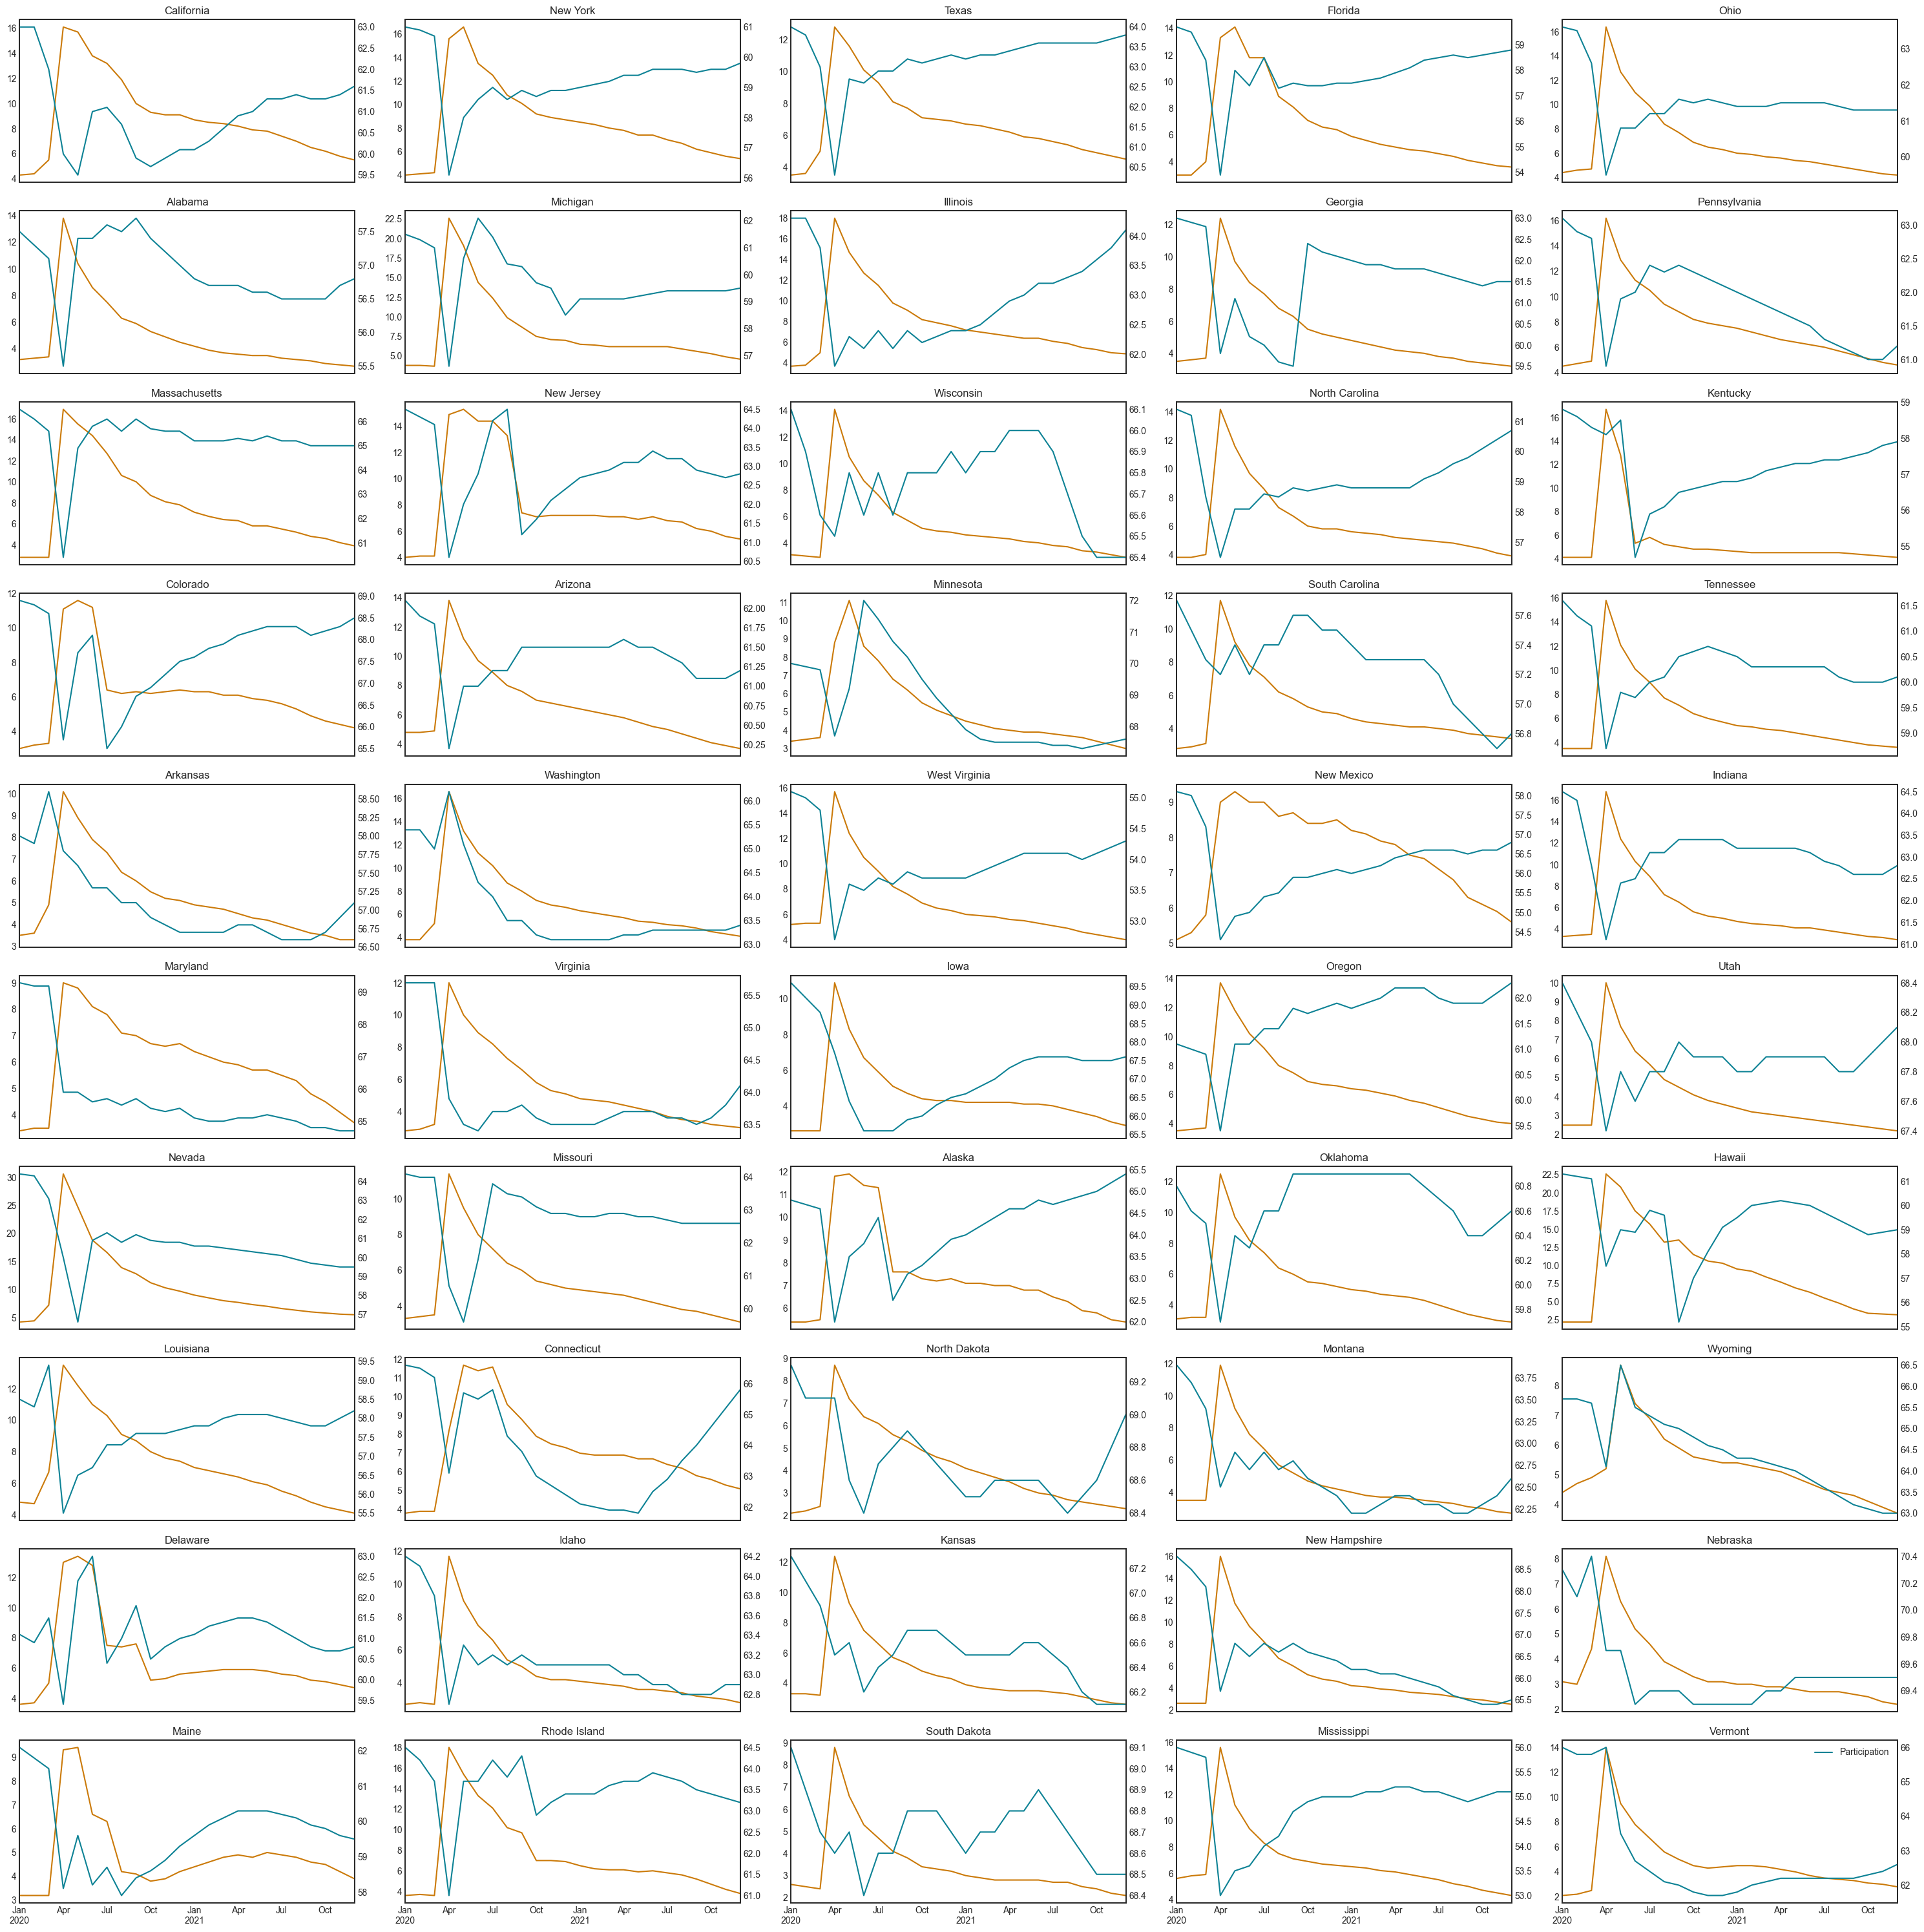

In [59]:
# loop through states and plot Participation and Unemployment

fig, axs = plt.subplots(10,5, figsize=(30,30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state == 'District of Columbia':
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax= axs[i], label= 'Unemployment', color = color_pal['gold'])
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax= ax2, label= 'Participation', color = color_pal['aqua'])
    #ax2.grid(False)
    axs[i].set_title(state)
    i += 1

plt.tight_layout()
plt.show()